## Homework 6

This homework is based on the Boston data.
Fit "the biggest model" (multiple linear regression) that you possibly can (including interactions and categorical variables).
Whoever achieves the highest $R^2$ wins :)


### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

### Import the dataset

Dataset Description:
The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air'.

Features Description:
- **CRIM**: per capita crime rate by town
- **ZN**: proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS**: proportion of non-retail business acres per town
- **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX**: nitric oxides concentration (parts per 10 million)
- **RM**: average number of rooms per dwelling
- **AGE**: proportion of owner-occupied units built prior to 1940
- **DIS**: weighted distances to five Boston employment centres
- **RAD**: index of accessibility to radial highways
- **TAX**: full-value property-tax rate per 10,000 dollars
- **PTRATIO**: pupil-teacher ratio by town
- **BLACK**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- **LSTAT**: percentage lower status of the population
- **MEDV**: Median value of owner-occupied homes in 1000's dollars

In [2]:
boston = pd.read_csv('../../Data/boston.csv')

X = boston.drop('medv', axis=1)
y = boston['medv']

boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
boston.shape

(506, 14)

In [4]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Exploratory Data Analysis

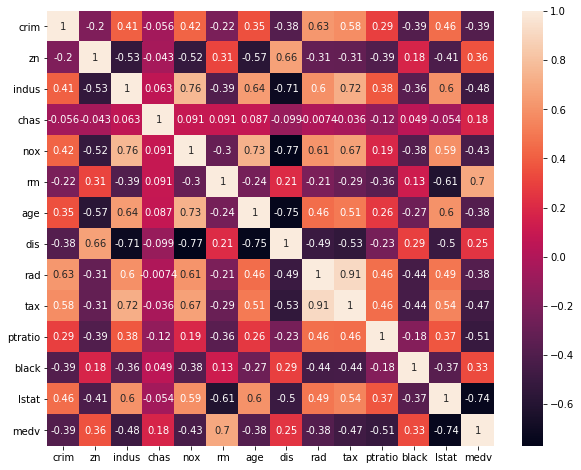

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(boston.corr(), annot=True)

#### Filtering Strong Positive Correlated Independent Variables

In [7]:
threshold = 0.7
num_of_columns = X.shape[1]
print('Correlation > {}:\n'.format(threshold))

for i in range(num_of_columns):
    row = X.corr().iloc[i, i+1:]
    correlation_values = row[row > threshold]
    if len(correlation_values) > 0:
        print('{}\n'.format(correlation_values))

Correlation > 0.7:

nox    0.763651
tax    0.720760
Name: indus, dtype: float64

age    0.73147
Name: nox, dtype: float64

tax    0.910228
Name: rad, dtype: float64



Scatter Plots for Strong Positive Correlations:


Text(0, 0.5, 'tax')

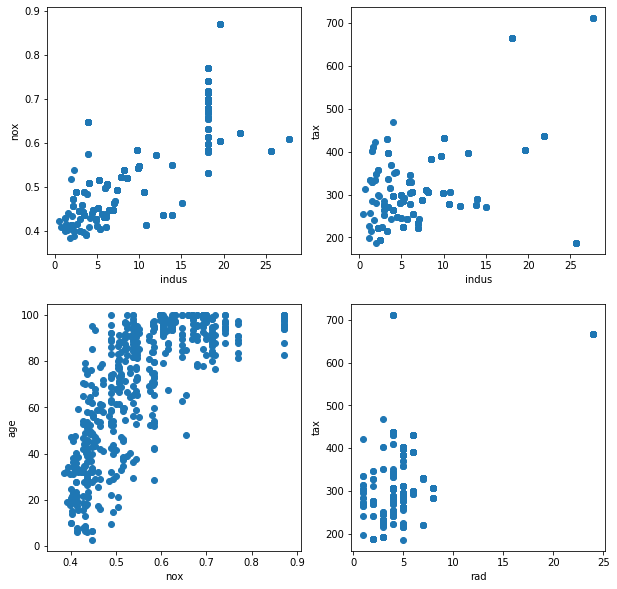

In [8]:
plt.figure(figsize=(10,10))

print('Scatter Plots for Strong Positive Correlations:')

plt.subplot(2,2,1)
plt.scatter(X['indus'], X['nox'])
plt.xlabel('indus')
plt.ylabel('nox')

plt.subplot(2,2,2)
plt.scatter(X['indus'], X['tax'])
plt.xlabel('indus')
plt.ylabel('tax')

plt.subplot(2,2,3)
plt.scatter(X['nox'], X['age'])
plt.xlabel('nox')
plt.ylabel('age')

plt.subplot(2,2,4)
plt.scatter(X['rad'], X['tax'])
plt.xlabel('rad')
plt.ylabel('tax')

#### Looking for Strong Negative Correlation on Independent Variables

In [9]:
threshold = -0.7
num_of_columns = X.shape[1]
print('Correlation < {}:\n'.format(threshold))

for i in range(num_of_columns):
    row = X.corr().iloc[i, i+1:]
    correlation_values = row[row < threshold]
    if len(correlation_values) > 0:
        print('{}\n'.format(correlation_values))

Correlation < -0.7:

dis   -0.708027
Name: indus, dtype: float64

dis   -0.76923
Name: nox, dtype: float64

dis   -0.747881
Name: age, dtype: float64



Scatter Plots for Strong Negative Correlations:


Text(0, 0.5, 'dis')

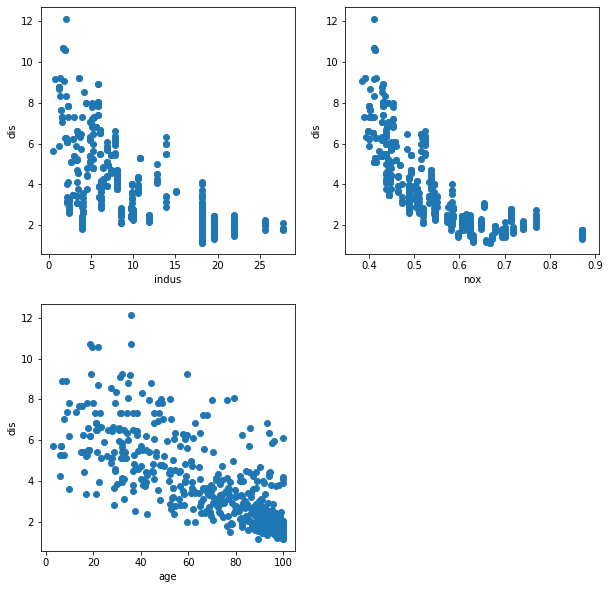

In [10]:
plt.figure(figsize=(10,10))

print('Scatter Plots for Strong Negative Correlations:')

plt.subplot(2,2,1)
plt.scatter(X['indus'], X['dis'])
plt.xlabel('indus')
plt.ylabel('dis')

plt.subplot(2,2,2)
plt.scatter(X['nox'], X['dis'])
plt.xlabel('nox')
plt.ylabel('dis')

plt.subplot(2,2,3)
plt.scatter(X['age'], X['dis'])
plt.xlabel('age')
plt.ylabel('dis')

#### Scatter Plots of Independent Variables vs. Dependent Variable

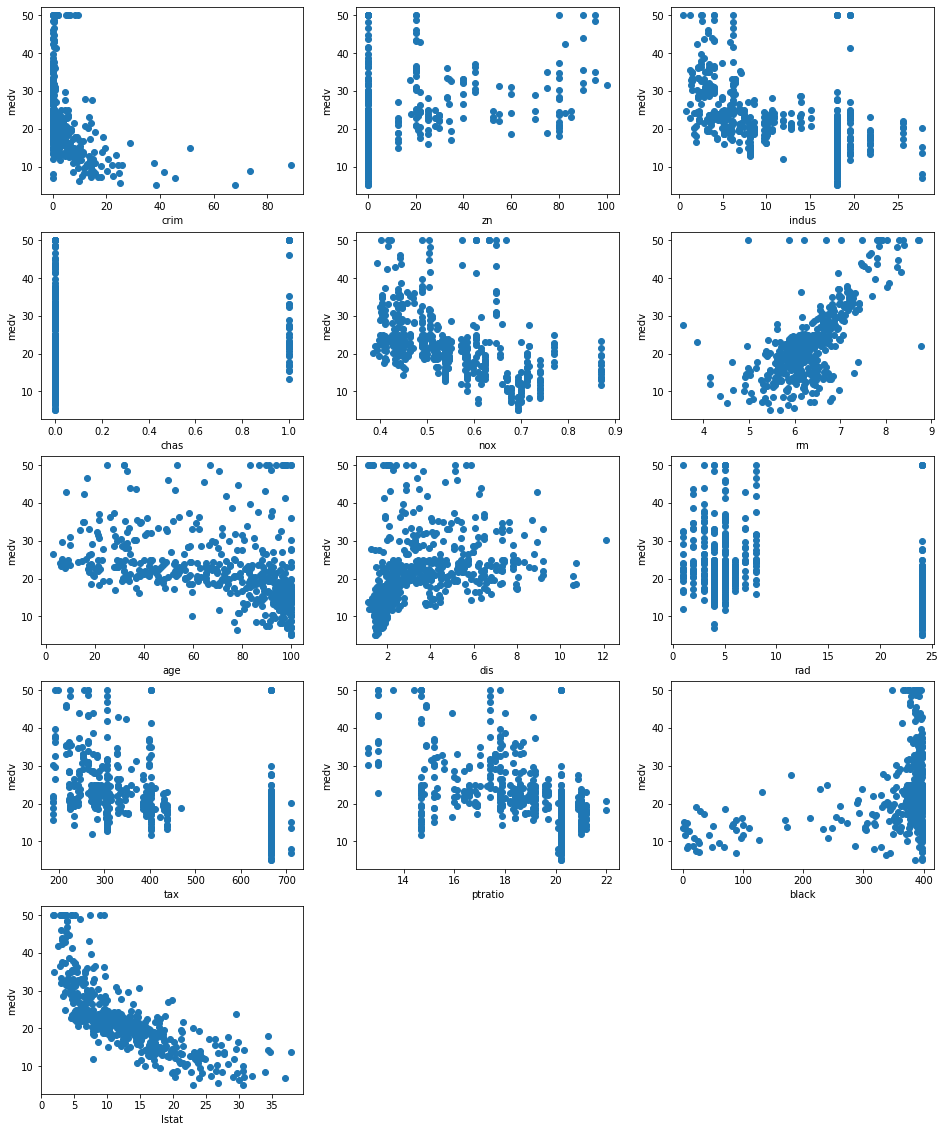

In [11]:
plt.figure(figsize=(16,20))

num_of_independent_variables = len(X.columns)
x_index = 0
y_index = 0

for i in range(num_of_independent_variables):
    plt.subplot(5,3,i+1)
    independent_variable = X.columns[i]
    plt.scatter(X[independent_variable], y)
    plt.xlabel(independent_variable)
    plt.ylabel(y.name)

### Feature Scaling

In [12]:
minmax_scaler = MinMaxScaler()
X_scaled = minmax_scaler.fit_transform(X)
boston_scaled = pd.DataFrame(X_scaled, columns=X.columns)
boston_scaled['medv'] = y
boston_scaled.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


### Model Fitting Without Interactions

In [13]:
x_column_names = list(X.columns)

while True: 
    dependent_var = 'medv'
    independent_vars = ''
    for name in x_column_names:
        if name == 'chas':
            independent_vars += ' + C(chas)'
        else:
            independent_vars += ' + ' + name
    formula = dependent_var + ' ~ ' + independent_vars[3:]

    model = smf.ols(formula, boston_scaled).fit()
    r_squared = round(model.rsquared, 3)
    print('R-Squared: {}'.format(r_squared))

    max_pvalue = model.pvalues[model.pvalues == model.pvalues.max()]
    variable = max_pvalue.index[0]
    pvalue = round(max_pvalue.values[0], 3)
    if pvalue > 0.01:
        x_column_names.remove(variable)
        print('Removing Variable...\nName: {}\nP-Value: {}\n'.format(variable, pvalue))
    else:
        break

R-Squared: 0.741
Removing Variable...
Name: age
P-Value: 0.958

R-Squared: 0.741
Removing Variable...
Name: indus
P-Value: 0.738

R-Squared: 0.741


#### Final Model After Removing Non-Significant Features & Highest R-Squared Achieved

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Fri, 13 Nov 2020   Prob (F-statistic):          5.54e-137
Time:                        14:01:40   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         26.7718      2.315     11.564      0.000      22.223      31.320
C(chas)[T.1.0]     2.7187      0.854      3.183      0.002       1.040       4.397
crim              -9.6455      2.916     -3.307      0.001     -15.376      -3.915
zn                 4.5845      1.352      3.390      0.001       1.928       7.241
nox               -8.4447      1.718     -4.915      0.000     -11.820      -5.069
rm                19.8404      2.121      9.356      0.000      15.674      24.007
dis              -16.4152      2.042     -8.037      0.000     -20.428     -12.402
rad                6.8910      1.458      4.726      0.000       4.026       9.756
tax               -6.1717      1.767     -3.493      0.001      -9.644      -2.700
ptratio           -8.8973      1.213     -7.334      0.000     -11.281      -6.514
black              3.6846      1.060      3.475      0.001       1.601       5.768
lstat            -18.9373      1.719    -11.019      0.000     -22.314     -15.561
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                         28.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model Fitting With Interactions

In [15]:
poly_feat = PolynomialFeatures(interaction_only=True, include_bias=False)
X_with_interactions = poly_feat.fit_transform(X_scaled)

In [16]:
# RENAMING THE GENERATED POLY FEATURE NAMES WITH COMBINATION OF ORIGINAL NAMES

poly_feature_names = poly_feat.get_feature_names()
single_feature_names = poly_feature_names[:num_of_independent_variables]
original_columns = list(X.columns)

dict_mapping = {}
for i in range(num_of_independent_variables):
    dict_mapping[single_feature_names[i]] = original_columns[i]
    
for i in range(len(poly_feature_names)):
    old_name = poly_feature_names[i]
    if ' ' in old_name:
        splitted_values = old_name.split()
        first_corresponding_value = dict_mapping[splitted_values[0]]
        second_corresponding_value = dict_mapping[splitted_values[1]]
        poly_feature_names[i] = first_corresponding_value + second_corresponding_value
    else:
        corresponding_value = dict_mapping[old_name]
        poly_feature_names[i] = corresponding_value

In [17]:
X_with_interactions = pd.DataFrame(X_with_interactions, columns=poly_feature_names)
boston_with_interactions = X_with_interactions.copy()
boston_with_interactions['medv'] = y

In [18]:
x_columns = list(X_with_interactions.columns)
highest_rsquared = 0
best_features = []

while True: 
    independent_vars = ''
    for col in x_columns:
        if col == 'chas':
            independent_vars += ' + C(chas)'
        else:
            independent_vars += ' + ' + col
    dependent_var = 'medv'
    formula = dependent_var + ' ~ ' + independent_vars[3:]

    model = smf.ols(formula, boston_with_interactions).fit()
    r_squared = round(model.rsquared, 3)
    print('R-Squared: {}'.format(r_squared))
    
    if r_squared >= highest_rsquared:
        highest_rsquared = r_squared
        best_features = x_columns.copy()

    max_pvalue = model.pvalues[model.pvalues == model.pvalues.max()]
    variable = max_pvalue.index[0]
    pvalue = round(max_pvalue.values[0], 3)
    if pvalue > 0.01:
        x_columns.remove(variable)
        print('Removing Variable...\nName: {}\nP-Value: {}\n'.format(variable, pvalue))
    else:
        break

R-Squared: 0.921
Removing Variable...
Name: znage
P-Value: 0.999

R-Squared: 0.921
Removing Variable...
Name: taxblack
P-Value: 0.998

R-Squared: 0.921
Removing Variable...
Name: znnox
P-Value: 0.997

R-Squared: 0.921
Removing Variable...
Name: radtax
P-Value: 0.983

R-Squared: 0.921
Removing Variable...
Name: znrm
P-Value: 0.977

R-Squared: 0.921
Removing Variable...
Name: nox
P-Value: 0.941

R-Squared: 0.921
Removing Variable...
Name: noxrad
P-Value: 0.933

R-Squared: 0.921
Removing Variable...
Name: crimindus
P-Value: 0.913

R-Squared: 0.921
Removing Variable...
Name: znindus
P-Value: 0.899

R-Squared: 0.921
Removing Variable...
Name: ptratiolstat
P-Value: 0.899

R-Squared: 0.921
Removing Variable...
Name: znblack
P-Value: 0.876

R-Squared: 0.921
Removing Variable...
Name: dis
P-Value: 0.886

R-Squared: 0.921
Removing Variable...
Name: indusage
P-Value: 0.879

R-Squared: 0.921
Removing Variable...
Name: induslstat
P-Value: 0.724

R-Squared: 0.921
Removing Variable...
Name: ptratiobl

#### Final Model After Removing Non-Significant Features

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     131.7
Date:                Fri, 13 Nov 2020   Prob (F-statistic):          1.32e-220
Time:                        14:01:48   Log-Likelihood:                -1231.1
No. Observations:                 506   AIC:                             2536.
Df Residuals:                     469   BIC:                             2693.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -46.8755      6.421     -7.300      0.000     -59.493     -34.258
C(chas)[T.1.0]    22.7704      3.970      5.735      0.000      14.969      30.572
indus            -35.8778      5.995     -5.984      0.000     -47.659     -24.096
rm                92.0465      5.080     18.119      0.000      82.064     102.029
age               64.3737      7.901      8.148      0.000      48.848      79.899
tax               30.6426      6.472      4.735      0.000      17.925      43.360
ptratio           15.6143      4.381      3.564      0.000       7.005      24.224
black             25.0817      4.939      5.079      0.000      15.377      34.786
lstat             36.2459      6.892      5.259      0.000      22.703      49.788
crimchas         167.1311     25.572      6.536      0.000     116.880     217.382
crimnox         -117.3295     26.762     -4.384      0.000    -169.919     -64.741
crimrm           109.9283     16.898      6.506      0.000      76.724     143.133
crimrad          -54.3472     15.815     -3.437      0.001     -85.424     -23.271
crimlstat        110.4514     15.731      7.021      0.000      79.539     141.364
zntax             24.1995      5.642      4.289      0.000      13.113      35.286
znlstat          -34.3821      8.381     -4.103      0.000     -50.850     -17.914
indusnox          29.3479      6.040      4.859      0.000      17.479      41.217
indusrm           55.1965     10.356      5.330      0.000      34.846      75.547
chasnox          -12.9733      2.561     -5.066      0.000     -18.005      -7.942
chasrm           -29.2117      5.151     -5.671      0.000     -39.335     -19.089
chaslstat        -13.5202      4.505     -3.001      0.003     -22.373      -4.668
noxage           -32.9414      4.682     -7.035      0.000     -42.142     -23.741
noxlstat          22.7225      6.839      3.322      0.001       9.283      36.162
rmage            -32.6473      6.909     -4.725      0.000     -46.223     -19.071
rmtax            -71.5157      8.848     -8.082      0.000     -88.903     -54.128
rmptratio        -32.6896      5.805     -5.631      0.000     -44.096     -21.283
rmlstat          -56.9120      6.864     -8.291      0.000     -70.401     -43.423
agedis           -24.0040      5.103     -4.704      0.000     -34.032     -13.976
agerad            15.3633      2.593      5.925      0.000      10.268      20.459
ageptratio       -14.7724      2.805     -5.266      0.000     -20.285      -9.260
ageblack         -27.5172      5.556     -4.953      0.000     -38.435     -16.599
agelstat         -22.4288      5.208     -4.307      0.000     -32.663     -12.195
distax           -25.4937      6.424     -3.969      0.000     -38.117     -12.870
dislstat          34.1508     11.639      2.934      0.004      11.280      57.022
radlstat    

#### Highest R-Squared Achieved

In [20]:
print('Highest R-Squared Achieved: {}'.format(highest_rsquared))
print('Features Used: {}\n{}'.format(len(best_features), best_features))

Highest R-Squared Achieved: 0.921
Features Used: 66
['crim', 'zn', 'indus', 'chas', 'rm', 'age', 'tax', 'ptratio', 'black', 'lstat', 'crimzn', 'crimchas', 'crimnox', 'crimrm', 'crimage', 'crimdis', 'crimrad', 'crimtax', 'crimptratio', 'crimblack', 'crimlstat', 'znchas', 'zndis', 'zntax', 'znptratio', 'znlstat', 'induschas', 'indusnox', 'indusrm', 'indusdis', 'indusrad', 'industax', 'indusptratio', 'chasnox', 'chasrm', 'chasrad', 'chastax', 'chasptratio', 'chasblack', 'chaslstat', 'noxrm', 'noxage', 'noxdis', 'noxtax', 'noxptratio', 'noxlstat', 'rmage', 'rmdis', 'rmtax', 'rmptratio', 'rmblack', 'rmlstat', 'agedis', 'agerad', 'agetax', 'ageptratio', 'ageblack', 'agelstat', 'disrad', 'distax', 'disblack', 'dislstat', 'radlstat', 'taxptratio', 'taxlstat', 'blacklstat']
